In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot as plt
import datetime
from sklearn import feature_selection as fs

from statsmodels.tsa.seasonal import seasonal_decompose

# Tratamento dos Dados

In [86]:
df = pd.read_csv('arquivos/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
df['date'] = [f'{i[6:8]}'+'/'+f'{i[4:6]}'+'/'+f'{i[0:4]}' for i in df['date']]
df['date'] = [datetime.datetime.strptime(i,'%d/%m/%Y') for i in df['date']]
df.sort_values('date',inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,2014-05-02,437500.0,3.0,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,2014-05-02,790000.0,3.0,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,2014-05-02,675000.0,5.0,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,2014-05-02,555000.0,4.0,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,2014-05-02,440000.0,4.0,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [88]:
#colunas excluidas manualmente é importante que tenham acompanhamento de um especialista no tema dos dados
print(df.isnull().sum())
#como existe poucos valores faltantes, irei retira-los
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [89]:
colunas=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade']
for i in colunas:
    print(f'{i}=',df[i].unique())

bedrooms= [ 3.  5.  4.  2.  7.  6.  9.  1.  8.  0. 33. 10. 11.]
bathrooms= [2.25 2.5  1.5  1.75 3.25 1.   2.   2.75 3.   3.5  8.   4.25 3.75 4.
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 0.   6.75 7.5  0.5
 6.   7.75]
floors= [2.  1.  1.5 2.5 3.  3.5]
waterfront= [0 1]
view= [0 1 2 4 3]
grade= [ 9  8  7  6 10 12 11  5  4 13  1  3]


In [90]:
df['bathrooms']=df['bathrooms'].astype('int')
df['floors']=df['floors'].astype('int')
colunas=['bathrooms', 'floors']
for i in colunas:
    print(f'{i}=',df[i].unique())

bathrooms= [2 1 3 8 4 5 6 0 7]
floors= [2 1 3]


In [91]:
data_series=df[['date','price']]
data_series.set_index('date', inplace = True)

# Análise do Faturamento Diário

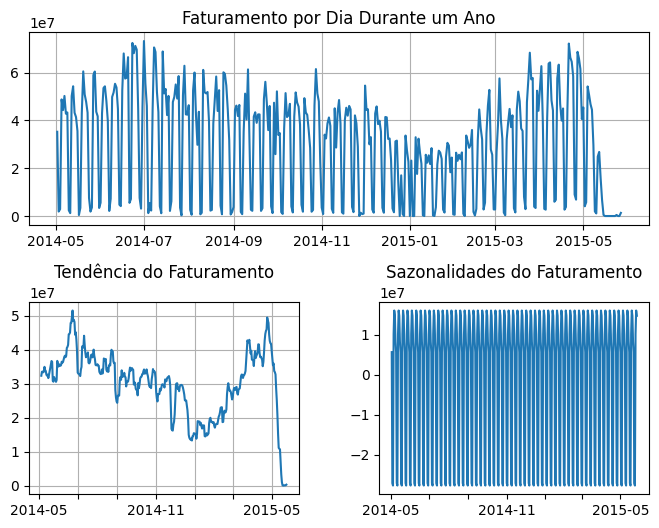

In [92]:
data_series_day=data_series.resample('D').sum()

decomposicao = seasonal_decompose(data_series_day)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal

fig=plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

ax=fig.add_subplot(2,1,1)
ax.set_title('Faturamento por Dia Durante um Ano')
plt.plot(data_series_day)
plt.grid(axis='both')

ax=fig.add_subplot(2,2,3)

ax.set_title('Tendência do Faturamento')
plt.plot(tendencia)
for i,tick in enumerate(ax.xaxis.get_ticklabels()):
    if i == 0 or i == 3 or i == 6:
        tick.set_visible(True)
    else:
        tick.set_visible(False)
plt.grid(axis='both')


ax=fig.add_subplot(2,2,4)
ax.set_title('Sazonalidades do Faturamento')
plt.plot(sazonal)
for i,tick in enumerate(ax.xaxis.get_ticklabels()):
    if i == 0 or i == 3 or i == 6:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

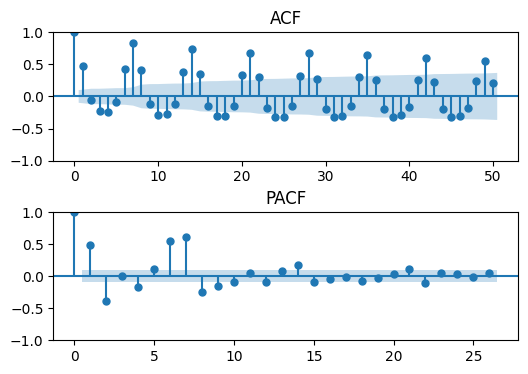

In [93]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(data_series_day,title='ACF',lags=50,alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(data_series_day,title='PACF',ax=ax)

plt.show()

Podemos ver uma serie temporal do faturamento diário no qual se tem um efeito sazonal de periodo de 7 dias pelo que indica o ACF

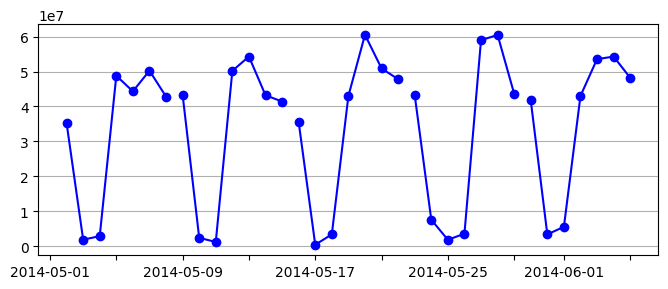

In [94]:
fig=plt.figure(figsize=(8,3))

ax=fig.add_subplot(1,1,1)


for i in range(5):
    plt.plot(data_series_day.iloc[i*7:(i+1)*7],marker='o',color='blue')


for i,tick in enumerate(ax.xaxis.get_ticklabels()):
    if i%2 == 0:
        tick.set_visible(True)
    else:
        tick.set_visible(False)

plt.grid(axis='y')

Podemos observar melhor essa sazonalidade diária pelo gráfico anterior, no qual se começa com um faturamento diário alto, logo em seguida uma queda, para novamente haver uma alta nos últimos 4 dias

c:\Users\marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


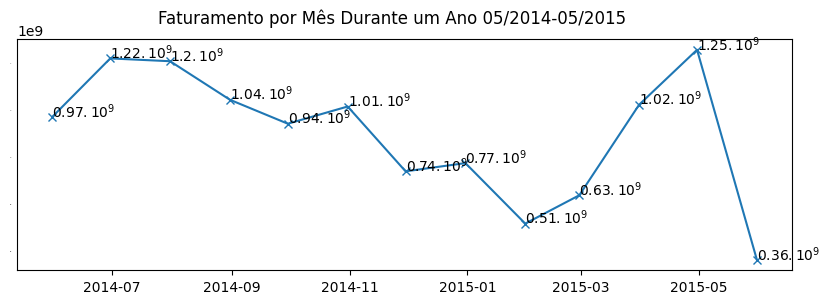

In [95]:
fig=plt.figure(figsize=(10,3))


#------------------------------------------------------------------
ax=fig.add_subplot(1,1,1)
fig.suptitle('Faturamento por Mês Durante um Ano 05/2014-05/2015')

data_series_mes=data_series.resample('M').sum()
plt.plot(data_series_mes, 'x-')

plt.tick_params(axis='y', labelsize=0, length=0)
aux=[datetime.datetime.strptime(i.isoformat()[:10],'%Y-%m-%d') for i in data_series_mes.index]
for i in aux:
    plt.text(i, data_series_mes.loc[i], f"{round(data_series_mes.loc[i].values[0]/1000000000,2)}"+r'$.10^{9}$')

Observe que o faturamento sofre tendencias ao passar os meses, oque afeta o ciclo sazonal, pois se tem uma tendencia de crescimento, cada periodo do ciclo terá um valor maior ou menor do que seu respectivo periodo no ciclo anterior do mês anterior.

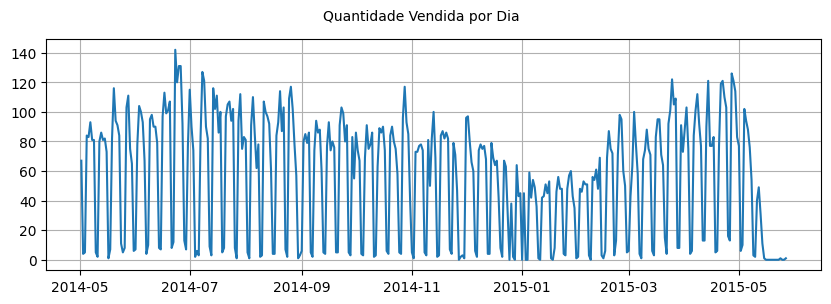

In [96]:
fig=plt.figure(figsize=(10,3))
fig.suptitle('Quantidade Vendida por Dia', fontsize=10)

plt.plot(data_series.resample('D').count())
plt.grid(axis='both')

Entretanto quando observamos a quantidade de casa vendidas por dia, nota-se uma grande semelhança com o gráfico de faturamento, indicando uma relação linear entre as duas variáveis. Ou seja, oque irá afetar principalmente o faturamento diário, será a quantidade vendida, e não o preço das casas que foram vendidas. 

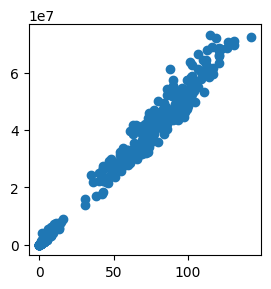

In [97]:
fig=plt.figure(figsize=(3,3))
plt.scatter(data_series.resample('D').count()['price'].values,data_series_day['price'].values)


Pelo gráfico acima podemos confirmar a relação linear entre quantidade e faturamento. Isso nos dar indicios de que a distribuição dos preços não tendem a mudar dependendo do faturamento. Por exemplo, o faturamento porque o preço das casas vendidas caiu, ou seja, uma queda de preços afetando o faturamento. Contudo, oque ralmente esta mais afetando é a quantidade de casa vendidas.

In [98]:
def prob(data, acu):
    aux=np.zeros(data.shape[0])
    
    #marcando no data frame valores que estao no vetor de acumulados
    data_aux=data.isin({'price':acu})
    
    
    #pegando os indices dos valores que estao no vetor acumulados
    indices=data[data_aux.price].index

    for i in indices:
        aux[i]=1
    return aux

In [99]:
def acumulativo(serie, porcentagem):
    #essa função recebe uma serie e porcentagem, e retornará um vetor tal que a soma de suas
    #frequencias sejam <=porcentagem, alem da soma das probabilidades desses valores e o maior a aparecer
    #obs: valores em vec não se repetem
    vec=[]
    cont=serie.value_counts(normalize=True)
    values=pd.DataFrame(cont.index)
    #ordenando os valores, pois se nao pegar na ordem de menor para maior valor de price, acabará pulando valores
    #na contagem do acumulado
    order=pd.DataFrame(values.sort_values(by=0, ascending=True).reset_index(drop=True))
    acu=0
    for i in order.values:
        value=i[0]
        acu+=cont.loc[value]
        if(acu>porcentagem):
            break
        else:
            vec.append(value)
    return np.resize(vec,(serie.shape[0])), acu, max(vec)[0]

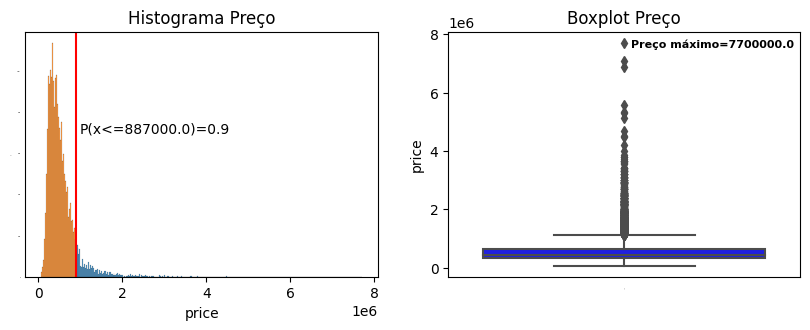

In [100]:
#fazendo uma copia com apenas a coluna que interessa
df_aux=df['price'].copy()
df_aux=pd.DataFrame(df_aux)

#fator de probabilidade
probi=0.9

#funções auxiliares
aux, acu, maxi=acumulativo(df_aux, probi)
df_aux.insert(1,'bool',prob(df_aux, aux))


fig=plt.figure(figsize=(10,7))


#histograma
ax=fig.add_subplot(2,2,1)
ax.set_title('Histograma Preço')
sns.histplot(data=df_aux[["price","bool"]],x="price",hue="bool",multiple="stack", legend=False)
plt.ylabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.axvline(x=maxi, ymin=0, ymax=700, color='red')
plt.text(maxi+100000, 700, f"""P(x<={maxi})={probi}""")



#boxplot
ax=fig.add_subplot(2,2,2)
ax.set_title('Boxplot Preço')
sns.boxplot(y="price",data=df,color='blue')
plt.xlabel([], fontsize=0)
plt.tick_params(axis='x', labelsize=0, length=0)

maximo=df['price'].max()
plt.text(0.02, maximo-150000, f"Preço máximo={maximo}", weight="bold",size=8)

plt.show()

Praticamente todos nossos dados de preços estão abaixo de 1 milhão, oque irá dificultar para o modelo a previsão para outliers, a não ser que haja características essenciais que caracterizam em sua maior parte preços de valores altos. Por exemplo, pode-se haver maior parte dos dados serem abaixo de 1 milhão, contudo ao saber localização (bairro, cidade, estado), ja ajudaria bastantes para detecção desses outliers. Pois bairros nobres tendem a terem casas mais caras, havendo uma variância menor nos preços das casas do bairro. Ou seja, uma características com menor variância para esses preços

In [101]:
print("media = ",df.price.mean())
print("desvio padrão = ",df.price.var()**(1/2))

media =  540144.5537763791
desvio padrão =  367148.1925238805


Mesmo sabendo que o fator principal do baixo faturamento é a quantidade, e não os preços. Entretanto iremos fazer um estudo de como se comportam os preços altos ao longo do tempo

Atribuindo a coluna de tendencia diaria do dia anterior

In [102]:
tendencia_column = tendencia.copy()
tendencia_column.loc[tendencia.index[-1]] = tendencia.loc[tendencia.index[-4]]
tendencia_column.loc[tendencia.index[-2]] = tendencia.loc[tendencia.index[-4]]
tendencia_column.loc[tendencia.index[-3]] = tendencia.loc[tendencia.index[-4]]
tendencia_column

date
2014-05-02             NaN
2014-05-03             NaN
2014-05-04             NaN
2014-05-05    3.231469e+07
2014-05-06    3.346976e+07
                  ...     
2015-05-23    6.364286e+04
2015-05-24    2.507857e+05
2015-05-25    2.507857e+05
2015-05-26    2.507857e+05
2015-05-27    2.507857e+05
Freq: D, Name: trend, Length: 391, dtype: float64

In [103]:
tendencia_column.index = [data.date() for data in tendencia_column.index]

In [104]:
aux = []
for index in range(len(df)):
  data = df['date'].iloc[index].date()

  if(data > tendencia_column.index[0]):

    aux.append(tendencia_column.loc[data-datetime.timedelta(days=1)])
  else:
    aux.append(float('nan'))

df['tendencia'] = aux

Colocando indicador do dia da semana na data

In [105]:
aux = []
index_day = 0
while index_day < len(data_series_day):
    for i in range(7):
        if(index_day+i<len(data_series_day)):
            aux.append(i)
        else:
            break
    index_day = index_day+7

data_series_day['dia'] = aux


aux = []
for i in range(len(df)):
    aux.append(data_series_day.loc[df.iloc[i]['date']]['dia'])

df['dia'] = aux
    

Indicador de mes para analises

In [106]:
indice_mes = 0
indice = 0
aux=[]
while(indice < len(df)):
    mes_atual = df['date'].iloc[indice].month
    mes_inicio = mes_atual
    while(mes_atual == mes_inicio and indice < len(df)):

        aux.append(indice_mes)
        if(indice < len(df)-1):
            indice += 1
            mes_atual = df['date'].iloc[indice].month
        else:
            indice += 1
    indice_mes += 1

In [107]:
df['month'] = aux

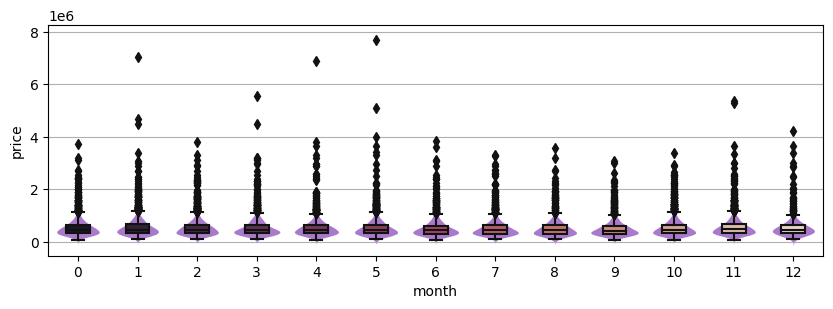

In [108]:
fig=plt.figure(figsize=(10,3))
ax = sns.violinplot(data=df, x='month', y='price', color="#af52f4", inner=None, linewidth=0, saturation=0.5)
sns.boxplot(data=df, x='month', y='price', saturation=0.5, width=0.4,
            palette='rocket', boxprops={'zorder': 2}, ax=ax)
plt.grid(axis='y')

Perceba que os dados em sua maior parte se distribuem de maneira iguais

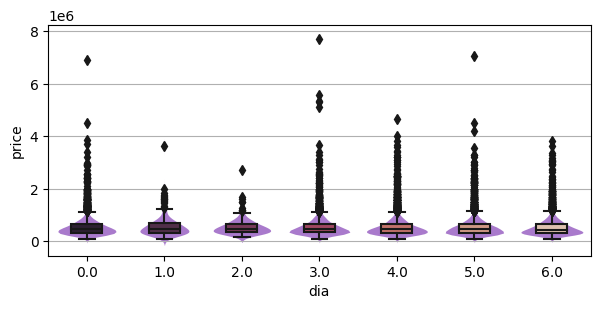

In [109]:
fig=plt.figure(figsize=(7,3))
ax = sns.violinplot(data=df, x='dia', y='price', color="#af52f4", inner=None, linewidth=0, saturation=0.5)
sns.boxplot(data=df, x='dia', y='price', saturation=0.5, width=0.4,
            palette='rocket', boxprops={'zorder': 2}, ax=ax)
plt.grid(axis='y')

Nesse gráfico podemos ver que sim, a sazonalidade na semana influencia na distribuição de preços, ou seja, não apenas a quantidade vendida influenciou.

<Axes: xlabel='month', ylabel='Count'>

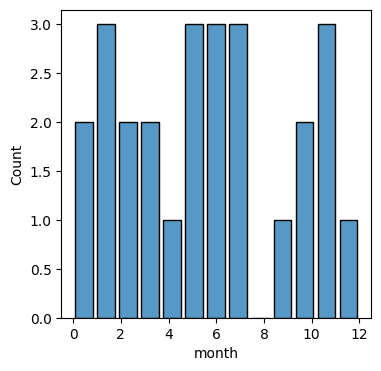

In [110]:
df_analise_price = df.query("price>1000000 and dia==1")
fig=plt.figure(figsize=(4,4))

sns.histplot(data=df_analise_price,x='month',bins=13, shrink=.8)

<Axes: xlabel='month', ylabel='Count'>

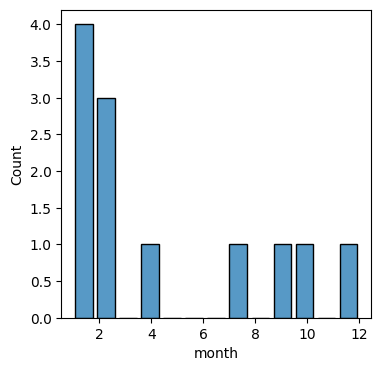

In [111]:
df_analise_price = df.query("price>1000000 and dia==2")
fig=plt.figure(figsize=(4,4))

sns.histplot(data=df_analise_price,x='month',bins=13, shrink=.8)

Pelos dois gráficos acima, note que dependendo do mês a quantidade de preços altos é maior, contudo não é uma quantidade significativa

<Axes: xlabel='month', ylabel='Count'>

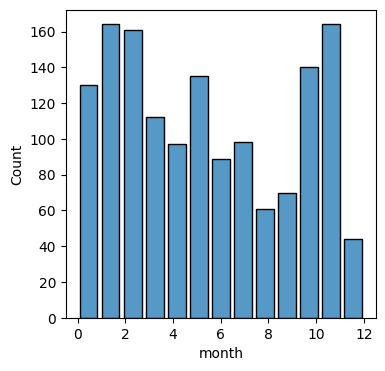

In [112]:
df_analise_price = df.query("price>1000000")
fig=plt.figure(figsize=(4,4))

sns.histplot(data=df_analise_price,x='month',bins=13, shrink=.8)

Note que a quantidade de outliers esta parece sofrer o mesmo comportamento das quantidade de vendas, e do faturamento diário. Portanto, sabemos agora que o comportamento do faturamento diário não afeta a maior parte dos dados, mas sim os outliers. Não apenas isso, perceba que parece afetar diretamente o cauda da distribuição. Ou seja, se o faturamento foi alto, tende a ter mais preços altos, mesmo que em sua grande maior parte a disribuição continue a mesma

In [113]:
data_series_outlier = data_series.query("price>=1000000").resample('D').count()
data_series_outlier.index = [data.date() for data in data_series_outlier.index]

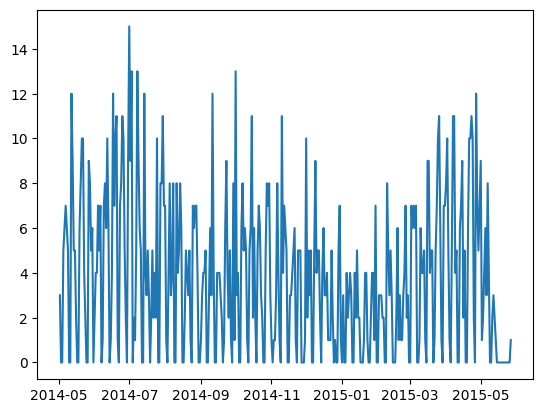

In [114]:
plt.plot(data_series_outlier)

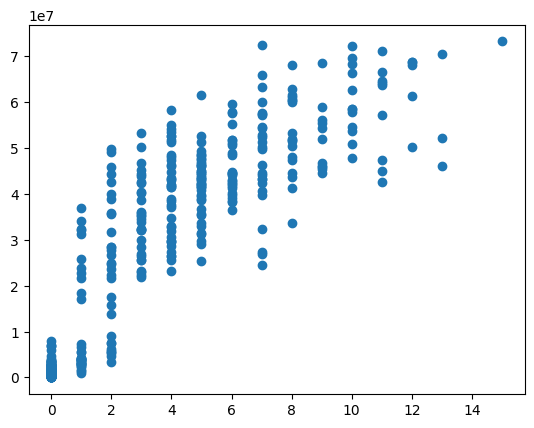

In [115]:
plt.scatter(data_series_outlier['price'].values,data_series_day['price'].values)

In [116]:
for i in range(1,8):
  aux = []
  for index in range(len(df)):
    data = df['date'].iloc[index].date()

    if(data >= data_series_outlier.index[i]):

      aux.append(data_series_outlier.loc[data-datetime.timedelta(days=i)]['price'])
    else:
      aux.append(float('nan'))
      
  df[f'QtdOutLiers-{i}'] = aux

df.dropna(inplace=True)

In [117]:
data_series_max = data_series.resample('D').max()
data_series_max.index = [data.date() for data in data_series_max.index]

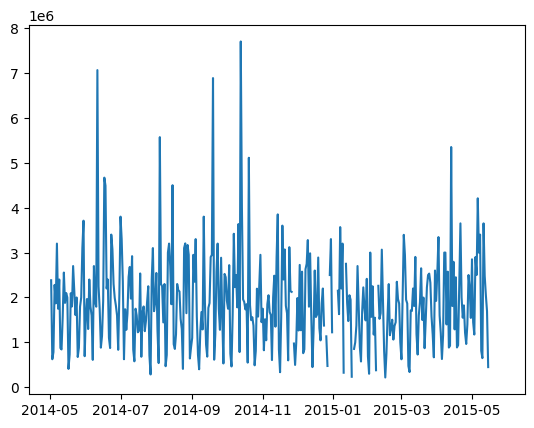

In [118]:
plt.plot(data_series_max)

In [125]:

aux = []
for index in range(len(df)):
    data = df['date'].iloc[index].date()

    if(data >= data_series_max.index[0]):

        aux.append(data_series_max.loc[data-datetime.timedelta(days=1)]['price'])
    else:
        aux.append(float('nan'))
    
df['max price'] = aux


In [128]:
columns = df.columns[-8:]

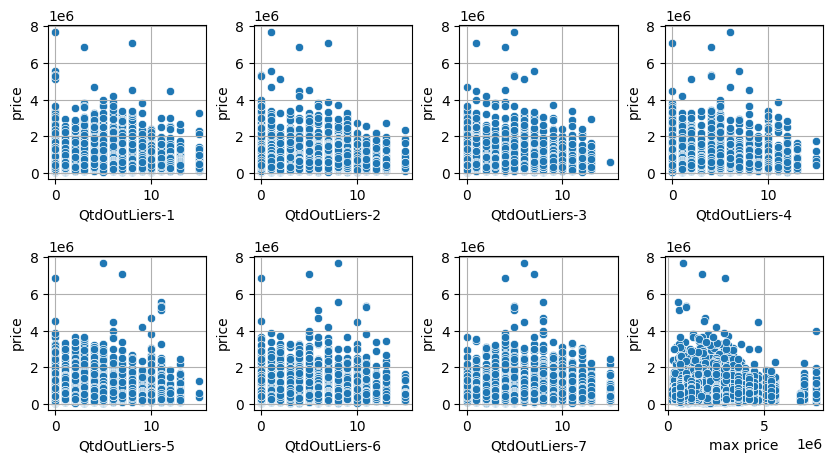

In [129]:
fig=plt.figure(figsize=(10,5))

plt.subplots_adjust(wspace=0.3, hspace=0.5)
for column in range(len(columns)):

    ax=fig.add_subplot(2,4,column+1)
    sns.scatterplot(data=df,x=columns[column],y='price')
    plt.grid(axis='both')


In [130]:
df.dropna(inplace=True)

In [131]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,dia,month,QtdOutLiers-1,QtdOutLiers-2,QtdOutLiers-3,QtdOutLiers-4,QtdOutLiers-5,QtdOutLiers-6,QtdOutLiers-7,max price
417,7214700160,2014-05-09,610000.0,3.0,3,2480,45302,1,0,0,...,0.0,0,6.0,7.0,6.0,5.0,0.0,0.0,3.0,1750000.0
418,9510900360,2014-05-09,260000.0,3.0,2,1920,8075,1,0,0,...,0.0,0,6.0,7.0,6.0,5.0,0.0,0.0,3.0,1750000.0
419,4298100060,2014-05-09,590000.0,4.0,2,2430,32496,1,0,0,...,0.0,0,6.0,7.0,6.0,5.0,0.0,0.0,3.0,1750000.0
420,2026049124,2014-05-09,325000.0,3.0,2,1352,1694,3,0,0,...,0.0,0,6.0,7.0,6.0,5.0,0.0,0.0,3.0,1750000.0
421,421079142,2014-05-09,415000.0,4.0,2,3060,48787,2,0,0,...,0.0,0,6.0,7.0,6.0,5.0,0.0,0.0,3.0,1750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,6752600320,2015-05-14,360000.0,4.0,2,2020,7289,2,0,0,...,6.0,12,2.0,3.0,2.0,0.0,0.0,4.0,8.0,2050000.0
21602,6815100380,2015-05-14,855000.0,3.0,1,1900,4000,1,0,0,...,6.0,12,2.0,3.0,2.0,0.0,0.0,4.0,8.0,2050000.0
21603,1422700040,2015-05-14,183000.0,3.0,1,1170,7320,1,0,0,...,6.0,12,2.0,3.0,2.0,0.0,0.0,4.0,8.0,2050000.0
21604,8730000270,2015-05-14,359000.0,2.0,2,1370,1140,2,0,0,...,6.0,12,2.0,3.0,2.0,0.0,0.0,4.0,8.0,2050000.0


In [132]:
x = df.drop(['price','date','id'],axis=1).values
y = df['price'].values
mi = fs.mutual_info_classif(x,y)

In [133]:
mi = pd.Series(mi)
mi.index =df.drop(['price','date','id'],axis=1).columns
mi.sort_values(ascending=False,inplace=True)

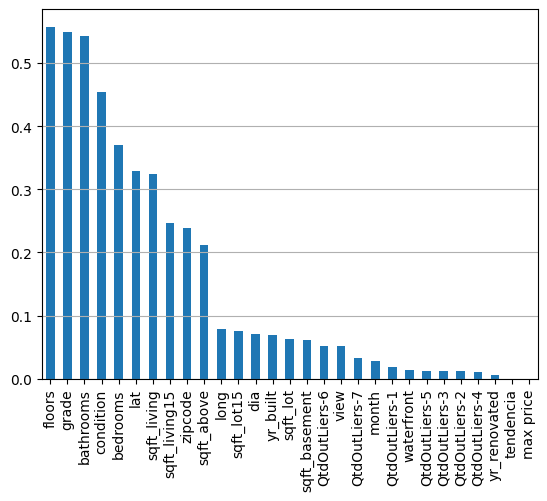

In [134]:
mi.plot.bar()
plt.grid(axis='y')

In [135]:
columns_select = mi.index[:10]

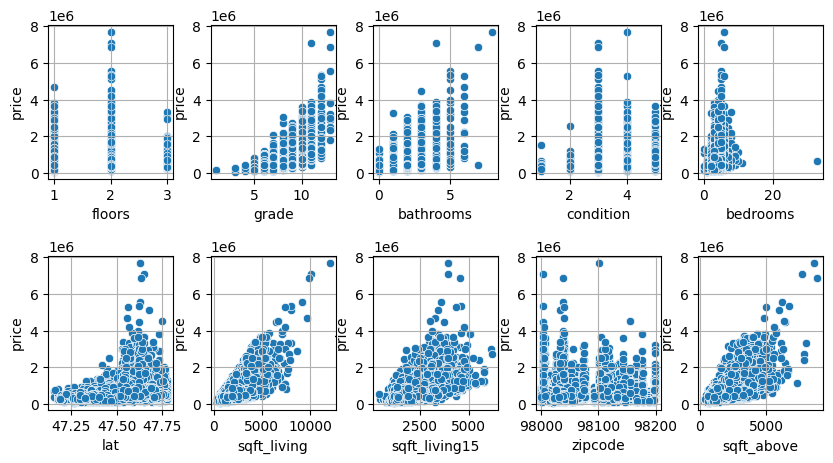

In [136]:
fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for column in range(len(columns_select)):

    ax=fig.add_subplot(2,5,column+1)
    sns.scatterplot(data=df,x=columns_select[column],y='price')
    plt.grid(axis='both')

In [138]:
columns = list(columns_select)
columns.extend(('tendencia','dia','QtdOutLiers-1','QtdOutLiers-2','QtdOutLiers-3','QtdOutLiers-4','QtdOutLiers-5','QtdOutLiers-6','QtdOutLiers-7','max price'))

In [139]:
X = df[columns].reset_index(drop=True)
X.to_csv("C:/Users/marcio/Documents/Codigos/Aprendizado_de_Maquina/arquivos/X.csv")

In [141]:
Y = df['price'].reset_index(drop=True)
Y.to_csv("C:/Users/marcio/Documents/Codigos/Aprendizado_de_Maquina/arquivos/Y.csv")